In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = '/Users/Willie/recording'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['的一個', '啦', '的那個', '那那個', 'ㄟ', '著', '吼', '嗯', '阿', 'ㄏㄧㄡ', '那', '的這個']


In [3]:
# Settings
feature_sets_path = './'
feature_sets_filename = '/Users/Willie/Part1.npz'
#model_filename = 'wake_word_stop_model.h5'
#wake_word = '嗯'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 5.  5. 10.  7.  5. 11.  4.  2. 10.  8.  3.  7.  3.  1.  8.  3.  3.  4.
 10.  9.  7.  7.  2. 11.  5. 11.  4. 10.  0.  7. 11.  7.  9.  1.  6.  5.]
[ 2.  5.  9.  2.  4.  2.  6.  1.  2.  8.  3.  4.  2.  1.  8. 11.  5.  3.
  0.  3. 11.  4.  1.  7.  7.  6.  3.  5.  9.  8.  9.  2.  5.  3. 10.  7.
  6.  8.  0.  4.  2.  9.  0.  4. 11.  7.  6.  1.  9.  8.  3.  2.  5.  7.
  7.  4. 11.  9.  5. 10.  4.  9.  1.  8.  1.  4.  7.  1.  0.  6.  6. 11.
  2.  8.  8.  4.  5.  3.  4. 11.  1.  6. 11. 11.  9.  3.  5.  1.  2.  8.
 10. 11.  4.  2.  0.  1.  0.  0.  0.  4.  3. 11.  5.  1. 10.  0.  1. 11.
  3.  6.  2.  0. 10.  9.  8.  2. 11.  5.  6.  4.  6.  9.  6.  5.  4.  4.
 10.  8.  3.  1.  4.  0.  5.  1.  5.  0. 10.  5.  2.  5. 10.  1.  9.  5.
  1.  4.  5.  4.  7. 10.  2. 11.  4.  2. 10.  0.  2.  3.  7.  7.  3. 10.
  1.  6.  7.  4.  1. 11. 10.  0.  8.  3.  9.  2.  3.  4.  3.  4.  5. 10.
  1.  6.  0. 11.  2.  8.  8.  1.  0. 10.  8.  3.  4.  7.  7.  9.  1.  6.
 11. 10.  1.  8.  3.  5. 10. 10.  2.  9.  7.  7.  

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(288, 16, 16)
(36, 16, 16)
(36, 16, 16)


In [7]:
# Peek at labels
print(y_val)

[11.  5.  8. 10.  9.  8. 11.  9.  0.  8.  5.  9.  0.  6.  2.  6.  8.  1.
  8.  9.  8. 10.  3.  8. 10.  6.  8.  4.  6.  1.  9.  3. 10.  0.  6.  8.]


In [8]:
# Peek at labels after conversion
print(y_test)

[ 5.  5. 10.  7.  5. 11.  4.  2. 10.  8.  3.  7.  3.  1.  8.  3.  3.  4.
 10.  9.  7.  7.  2. 11.  5. 11.  4. 10.  0.  7. 11.  7.  9.  1.  6.  5.]


In [9]:
# View the dimensions of our input data
print(x_train.shape)

(288, 16, 16)


In [10]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(288, 16, 16, 1)
(36, 16, 16, 1)
(36, 16, 16, 1)


In [11]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation='softmax'))
# Display model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0

In [13]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=10e-4),    #'adam'
              metrics=['acc'])

/Users/Willie/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=150, 
                    batch_size=20, 
                    validation_data=(x_val, y_val))

Epoch 1/150
15/15 [==============================] - 1s 23ms/step - loss: 3.3541 - acc: 0.0764 - val_loss: 2.4771 - val_acc: 0.1389
Epoch 2/150
15/15 [==============================] - 0s 7ms/step - loss: 2.5613 - acc: 0.0799 - val_loss: 2.4654 - val_acc: 0.1944
Epoch 3/150
15/15 [==============================] - 0s 8ms/step - loss: 2.4651 - acc: 0.1319 - val_loss: 2.4386 - val_acc: 0.1667
Epoch 4/150
15/15 [==============================] - 0s 9ms/step - loss: 2.4144 - acc: 0.1354 - val_loss: 2.3883 - val_acc: 0.2778
Epoch 5/150
15/15 [==============================] - 0s 10ms/step - loss: 2.3962 - acc: 0.1389 - val_loss: 2.3849 - val_acc: 0.1944
Epoch 6/150
15/15 [==============================] - 0s 8ms/step - loss: 2.3003 - acc: 0.1910 - val_loss: 2.2794 - val_acc: 0.2500
Epoch 7/150
15/15 [==============================] - 0s 11ms/step - loss: 2.2523 - acc: 0.2118 - val_loss: 2.1947 - val_acc: 0.3333
Epoch 8/150
15/15 [==============================] - 0s 11ms/step - loss: 2.2096

Epoch 63/150
15/15 [==============================] - 0s 15ms/step - loss: 0.2971 - acc: 0.9062 - val_loss: 0.5505 - val_acc: 0.8889
Epoch 64/150
15/15 [==============================] - 0s 11ms/step - loss: 0.3013 - acc: 0.8993 - val_loss: 0.5945 - val_acc: 0.8611
Epoch 65/150
15/15 [==============================] - 0s 12ms/step - loss: 0.3201 - acc: 0.8576 - val_loss: 0.4386 - val_acc: 0.8889
Epoch 66/150
15/15 [==============================] - 0s 13ms/step - loss: 0.3015 - acc: 0.9097 - val_loss: 0.6652 - val_acc: 0.8333
Epoch 67/150
15/15 [==============================] - 0s 10ms/step - loss: 0.2645 - acc: 0.8993 - val_loss: 0.5536 - val_acc: 0.8889
Epoch 68/150
15/15 [==============================] - 0s 8ms/step - loss: 0.2979 - acc: 0.8924 - val_loss: 0.5324 - val_acc: 0.8889
Epoch 69/150
15/15 [==============================] - 0s 11ms/step - loss: 0.3083 - acc: 0.8924 - val_loss: 0.5252 - val_acc: 0.8611
Epoch 70/150
15/15 [==============================] - 0s 12ms/step - l

15/15 [==============================] - 0s 8ms/step - loss: 0.1184 - acc: 0.9653 - val_loss: 0.4965 - val_acc: 0.9444
Epoch 125/150
15/15 [==============================] - 0s 8ms/step - loss: 0.1256 - acc: 0.9583 - val_loss: 0.6746 - val_acc: 0.8889
Epoch 126/150
15/15 [==============================] - 0s 6ms/step - loss: 0.1175 - acc: 0.9618 - val_loss: 0.5351 - val_acc: 0.9167
Epoch 127/150
15/15 [==============================] - 0s 7ms/step - loss: 0.2110 - acc: 0.9375 - val_loss: 0.9921 - val_acc: 0.8611
Epoch 128/150
15/15 [==============================] - 0s 8ms/step - loss: 0.1958 - acc: 0.9340 - val_loss: 0.5596 - val_acc: 0.8611
Epoch 129/150
15/15 [==============================] - 0s 8ms/step - loss: 0.1643 - acc: 0.9479 - val_loss: 0.7110 - val_acc: 0.8056
Epoch 130/150
15/15 [==============================] - 0s 13ms/step - loss: 0.1774 - acc: 0.9618 - val_loss: 0.8248 - val_acc: 0.8333
Epoch 131/150
15/15 [==============================] - 0s 12ms/step - loss: 0.2629

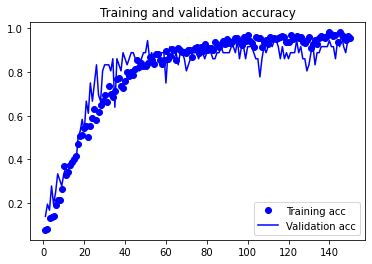

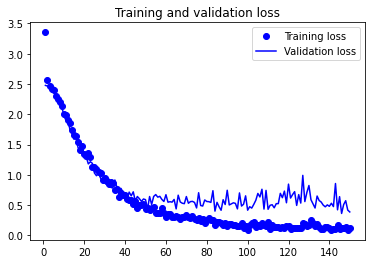

In [15]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Save the model as a file
models.save_model(model, '/Users/Willie/Test1.h5')

In [17]:
# TEST: Load model and run it against test set
model = models.load_model('/Users/Willie/Test1.h5')
for i in range(0, 5):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 5.0  Prediction: [[9.6249132e-04 3.7006766e-04 1.3819223e-03 1.6965561e-03 8.7117939e-04
  9.2368376e-01 5.4845000e-03 9.6077593e-03 2.2788137e-02 2.0113017e-03
  1.0790875e-03 3.0063123e-02]]
Answer: 5.0  Prediction: [[1.0390593e-06 8.1772072e-08 5.1425832e-09 1.7882341e-07 7.8025704e-07
  9.9989903e-01 1.8793100e-05 7.0928952e-05 5.2705923e-06 3.4566012e-06
  3.0484564e-08 2.4968736e-07]]
Answer: 10.0  Prediction: [[4.4289604e-03 1.6521271e-05 5.2040386e-01 6.0813021e-02 7.5189313e-03
  2.1043958e-04 4.3443792e-06 4.0525672e-01 1.6743523e-05 1.0582409e-05
  2.2039245e-04 1.0995662e-03]]
Answer: 7.0  Prediction: [[1.9871660e-10 4.7312132e-09 3.6134862e-04 5.4845655e-06 1.0197774e-09
  2.0865500e-08 1.9511568e-09 9.9943596e-01 1.0408720e-07 4.7793219e-12
  5.1215334e-11 1.9710686e-04]]
Answer: 5.0  Prediction: [[4.1841988e-09 1.5658141e-11 4.7335505e-15 3.6030796e-12 2.0140379e-11
  9.9999952e-01 7.8006877e-08 4.2716974e-10 6.4052863e-08 3.1781806e-07
  2.7843106e-10 3.1978971e

In [18]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.5446 - acc: 0.8889


[0.5445926189422607, 0.8888888955116272]